In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_excel('winequality.xlsx')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0


In [28]:
df.dropna(subset=['volatile acidity'], how='all', inplace=True)
df['volatile acidity'].isnull().values.sum()
df.dropna(subset=['fixed acidity'], how='all', inplace=True)
df['fixed acidity'].isnull().values.sum()
df.dropna(subset=['type'], how='all', inplace=True)
df['type'].isnull().values.sum()

0

In [29]:
X=df.iloc[:,0:2]  # independent
y=df.iloc[:,2]   # dependent 
y

0       0.270
1       0.300
2       0.280
3       0.230
4       0.230
        ...  
6492    0.600
6493    0.550
6494    0.510
6495    0.645
6496    0.310
Name: volatile acidity, Length: 6480, dtype: float64

In [30]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6480 entries, 0 to 6496
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   type           6480 non-null   object 
 1   fixed acidity  6480 non-null   float64
dtypes: float64(1), object(1)
memory usage: 151.9+ KB


In [31]:
from sklearn.preprocessing import LabelEncoder
X_labelencoder = LabelEncoder()
X.iloc[:, 0] = X_labelencoder.fit_transform(X.iloc[:, 0])
print (X)

# for y
y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
print (y)

      type  fixed acidity
0        1            7.0
1        1            6.3
2        1            8.1
3        1            7.2
4        1            7.2
...    ...            ...
6492     0            6.2
6493     0            5.9
6494     0            6.3
6495     0            5.9
6496     0            6.0

[6480 rows x 2 columns]
[ 36  42  38 ...  82 106  44]


In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [33]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(criterion = "entropy",max_depth=2)
decision_tree.fit(X_train, y_train) # training to machine
predictValues =decision_tree.predict(X_test) # test the machine 
predictValues

array([38, 38, 38, ..., 38, 38, 38], dtype=int64)

In [34]:
from sklearn.metrics import accuracy_score
import numpy as np

print(accuracy_score(y_test, predictValues))

0.03780864197530864


In [35]:
print(y_train)
X_train
X.columns

[ 36  50  95 ...  72 114  19]


Index(['type', 'fixed acidity'], dtype='object')

In [36]:
X_train

,type,fixed acidity
1717,1,6.8
5788,0,7.2
6244,0,6.1
3797,1,7.0
4465,1,6.6
...,...,...
2525,1,7.3
6459,0,7.8
3619,1,6.8
5718,0,7.0


In [37]:
y_train
[1,1,2]

[1, 1, 2]

In [38]:
data_feature_names = X.columns
from sklearn.tree import export_graphviz
from sklearn import tree
from graphviz import Source
from IPython.display import SVG
from IPython.display import display


In [39]:
graph = Source(tree.export_graphviz(decision_tree, feature_names=X.columns, filled = True,rounded=True))

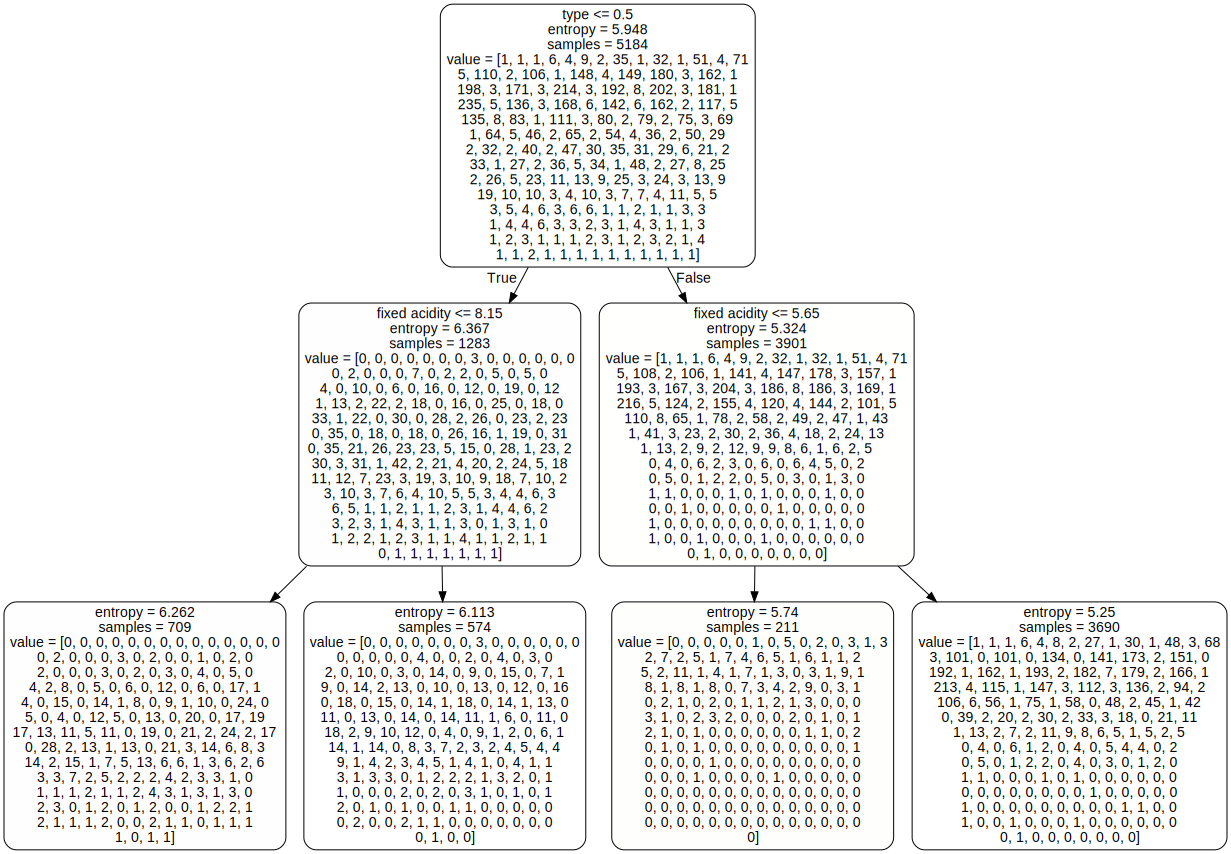

In [40]:
display(SVG(graph.pipe(format='svg')))